In [1]:
] activate .

  Activating project at `~/Julia`


In [39]:
using AutomaticSingleCellToolbox
using DataFrames

In [81]:
obj = Read10X("A2780_QC_mean");

[ Info: Currently, only support Cellranger's result!!!
[ Info: Reading matrix directory ...
[ Info: Generating matrix ...
[ Info: Reading barcodes ...
[ Info: Reading features/genes ...
[ Info: Gathering basic information


In [82]:
FeaturePercentage!(obj)

"Finished!"

[ Info: Drawing counts/features hex plot...


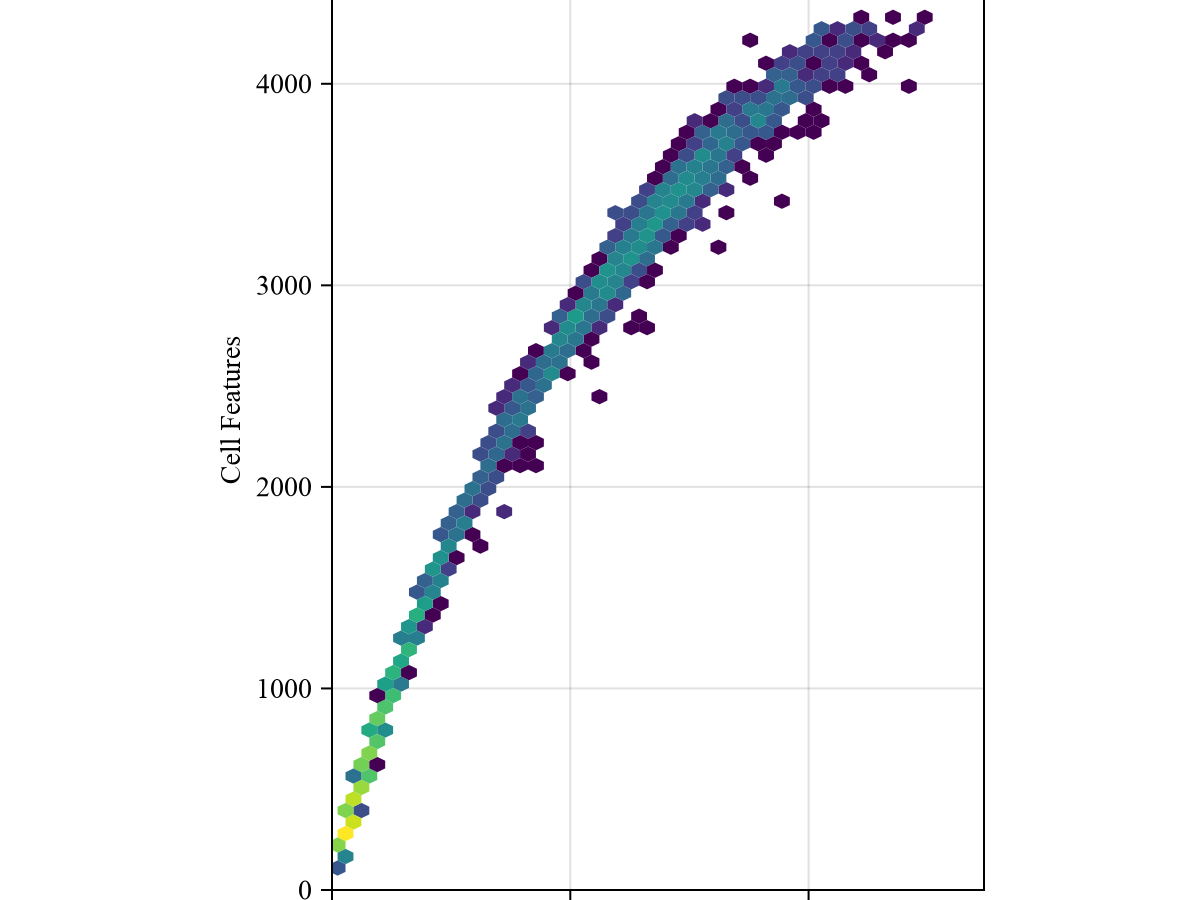

In [83]:
DrawQC(obj)

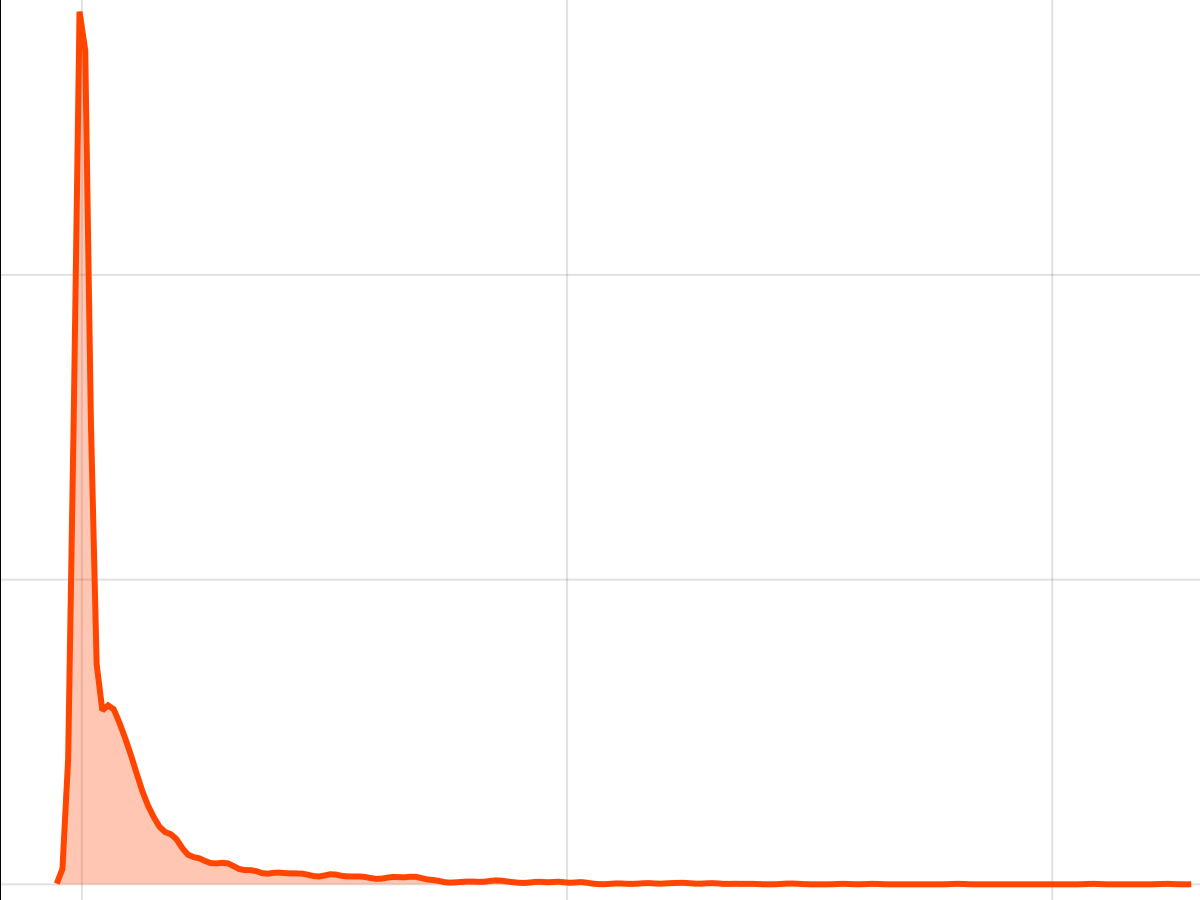

In [84]:
DrawQC(obj; obs_name="percentage_mt")

In [85]:
NormalizeData!(obj)

"Finished!"

In [86]:
SelectHVG!(obj)

[ Info: 2000 HVGs were selected automatically!


"Finished!"

In [87]:
obj.var = sort(obj.var, :hvg_var_std, rev=true)

Row,id,name,feature_cells,hvg_mean,hvg_var_std
,String,String,Int64,Float64,Float32
1,HIST1H4C,HIST1H4C,730,1.39722,10.5931
2,KCNMA1,KCNMA1,365,0.548565,7.67526
3,NTS,NTS,49,0.147289,6.99002
4,TMSB4X,TMSB4X,220,0.434619,6.46542
5,MEST,MEST,361,0.323282,6.4249
6,CDKN1A,CDKN1A,410,0.362714,6.3395
7,GCG,GCG,74,0.0840823,6.33831
8,PEG10,PEG10,203,0.148739,6.14211
9,CTGF,CTGF,98,0.0864019,5.90796


In [ ]:
# obj.var = filter(row -> 0.0125 <= row.hvg_mean <= 3.0, obj.var)

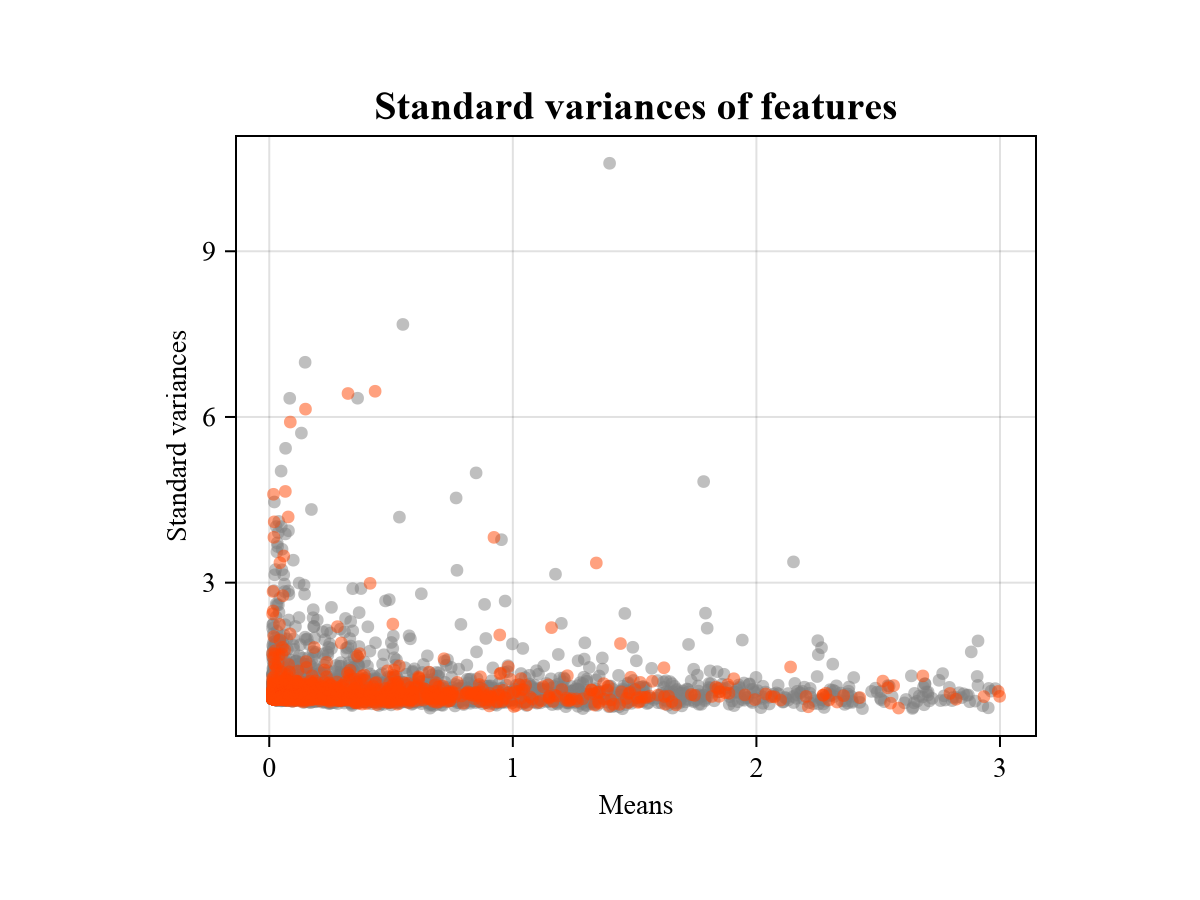

In [88]:
FeatureVariances(obj)

In [89]:
RegressObs!(obj; var = "percentage_mt")

"Finished!"

In [90]:
RegressObs!(obj; var = "cell_counts")

"Finished!"

In [91]:
PCA!(obj)

[ Info: Scaling data...
[ Info: Running PCA ...
[ Info: Looking for Elbow threshold...
[ Info: We recommend top 14 PCs for downstream analysis automatically!


"Finished!"

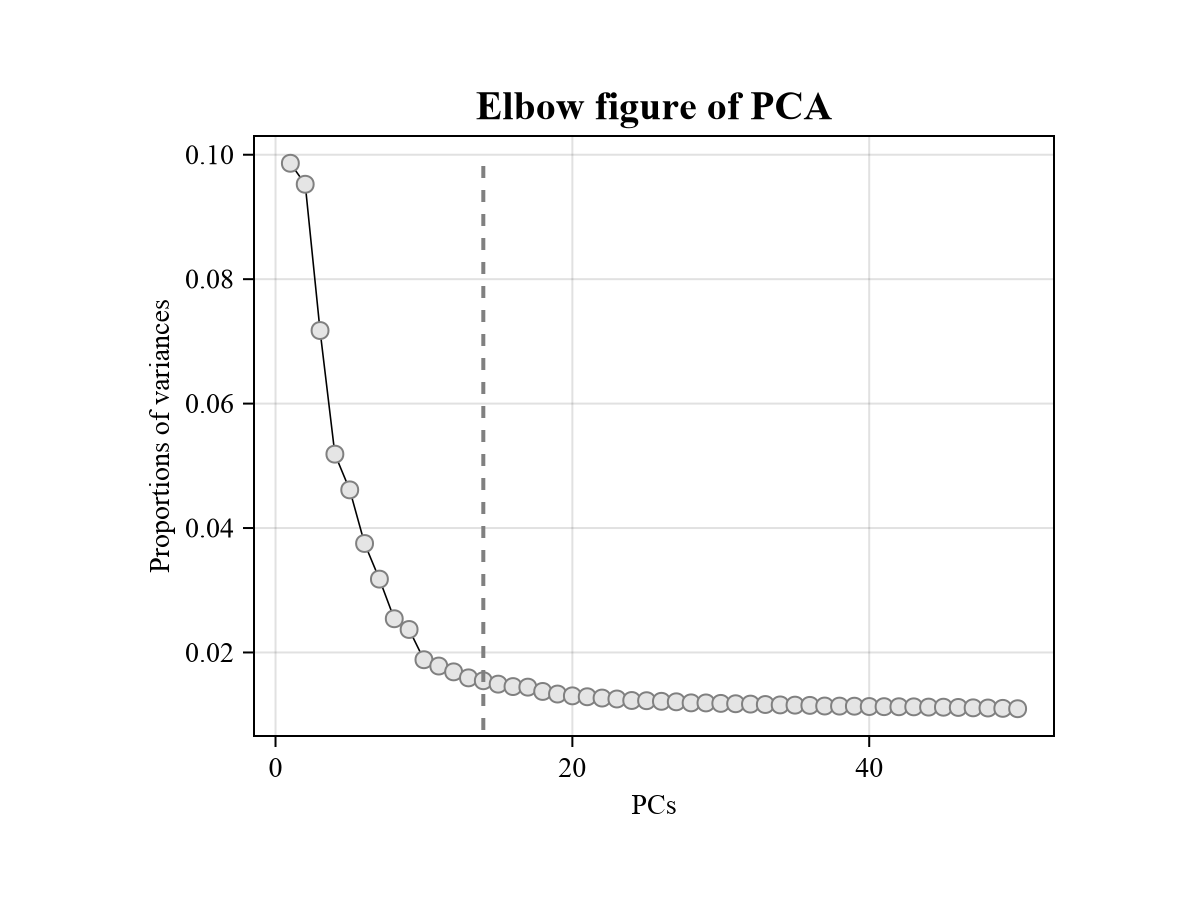

In [166]:
ElbowPCA(obj; path="Elbow_asct.pdf")

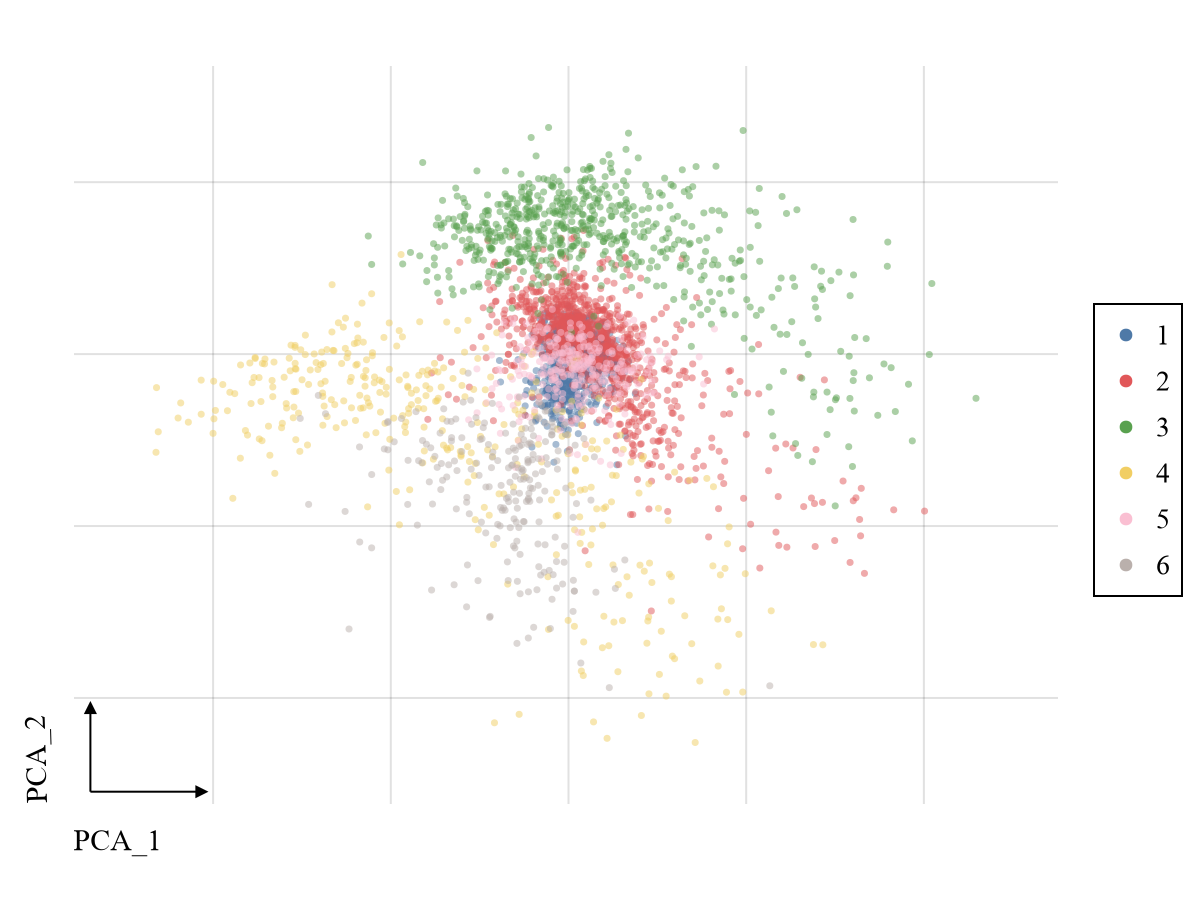

In [165]:
DimensionPoints(obj;dimension_name="pca", path="pca.pdf")

In [93]:
FeatureScore!(obj)

"Finished!"

In [99]:
UMAP!(obj)

[ Info: Running UMAP...


"Finished!"

In [100]:
Clustering!(obj)

[ Info: Max modularity: 0.89627194
[ Info: Max modularity: 0.8695105
[ Info: Max modularity: 0.85107875
[ Info: Max modularity: 0.83277005
[ Info: Max modularity: 0.8145299
[ Info: Recommended resolution is 0.5


"Finished!"

In [102]:
obj.log

10-element Vector{AbstractString}:
 "FeaturePercentage!(WsObj;regex=" ⋯ 29 bytes ⋯ "ptr=raw,obs_name=percentage_mt)"
 "NormalizeData!(WsObj;ptr=raw)"
 "SelectHVG!(WsObj;ptr=raw)"
 "RegressObs!(WsObj;var=percentage_mt,use_hvg=false,ptr=norm)"
 "RegressObs!(WsObj;var=cell_counts,use_hvg=false,ptr=norm)"
 "FastRowScale!(WsObj;center=true,scale=truescale_max=10,ptr=regress)"
 "PCA!(WsObj;max_pc=50,use_hvg=true,method=PCA,seed=-1,cut=14,ptr=auto)"
 "FeatureScore!(WsObj;features=Di" ⋯ 527 bytes ⋯ "me=cell_cycle,seed=1,ptr=norm)"
 "UMAP!(WsObj;reduction=pca,use_p" ⋯ 186 bytes ⋯ "_strength=1,neg_sample_rate=5)"
 "Clustering!(WsObj;method = mc,r" ⋯ 185 bytes ⋯ "0.06666666666666667,seed = -1)"

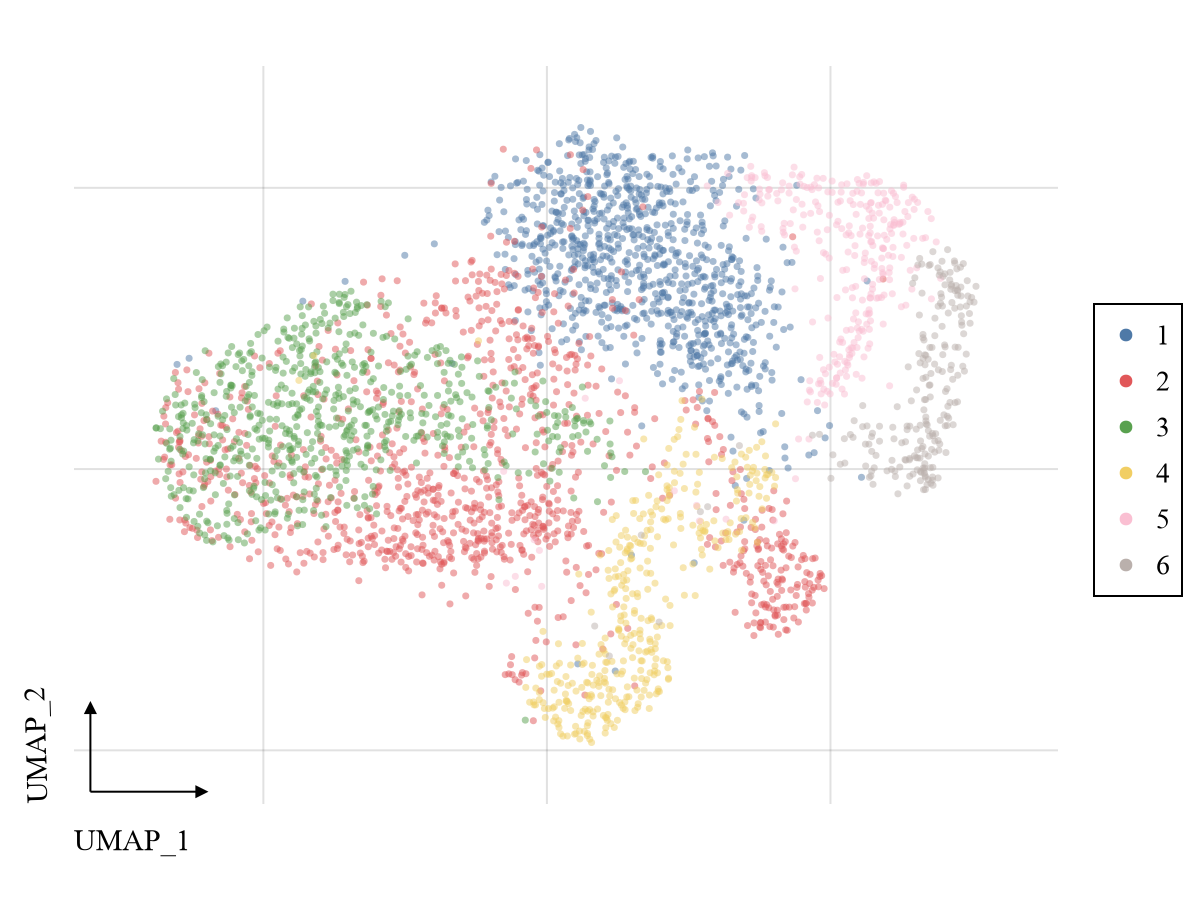

In [103]:
DimensionPoints(obj;path="A2780_umap_dim.pdf")

In [104]:
DE!(obj)

"Finished!"

In [105]:
groupby(obj.meta["clusters_latest_DE"],:group) |> 
    x -> combine(x) do y
        first(y,10)
end

Row,group,gene,score,pct1,log2fc
,String,String,Float64,Float64,Float64
1,1,MALSU1,0.0319857,0.244344,0.622872
2,1,TTI1,0.0443578,0.29638,0.604652
3,1,PCYT2,0.0325135,0.182127,0.602499
4,1,MRPL57,0.0382047,0.286199,0.582487
5,1,ASH1L-AS1,0.0314943,0.176471,0.57072
6,1,RAF1,0.0327935,0.255656,0.554591
7,1,LINC01006,0.0236272,0.149321,0.534821
8,1,PMPCA,0.0548519,0.429864,0.522986
9,1,RHOG,0.0250783,0.211538,0.517199


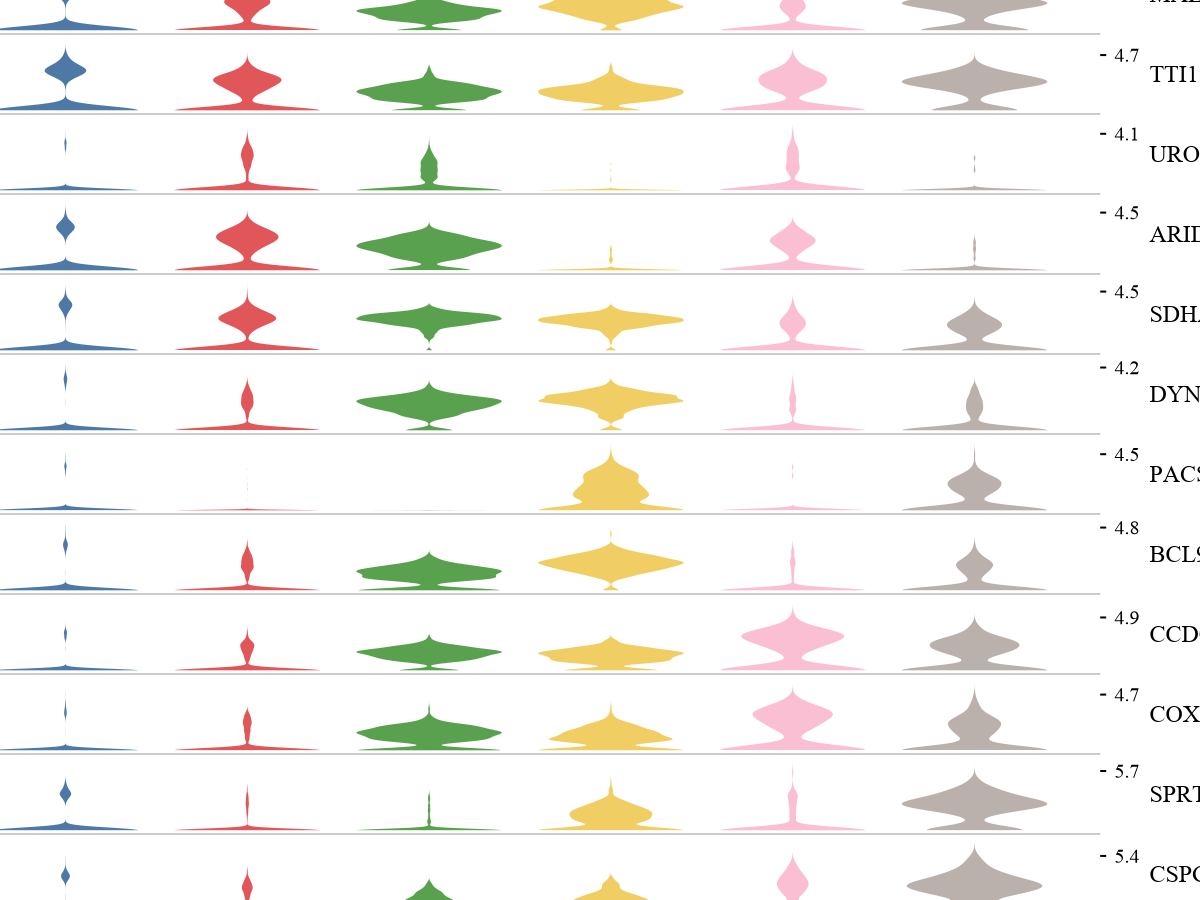

In [163]:
FeatureViolin(obj)
# path="violin.pdf"

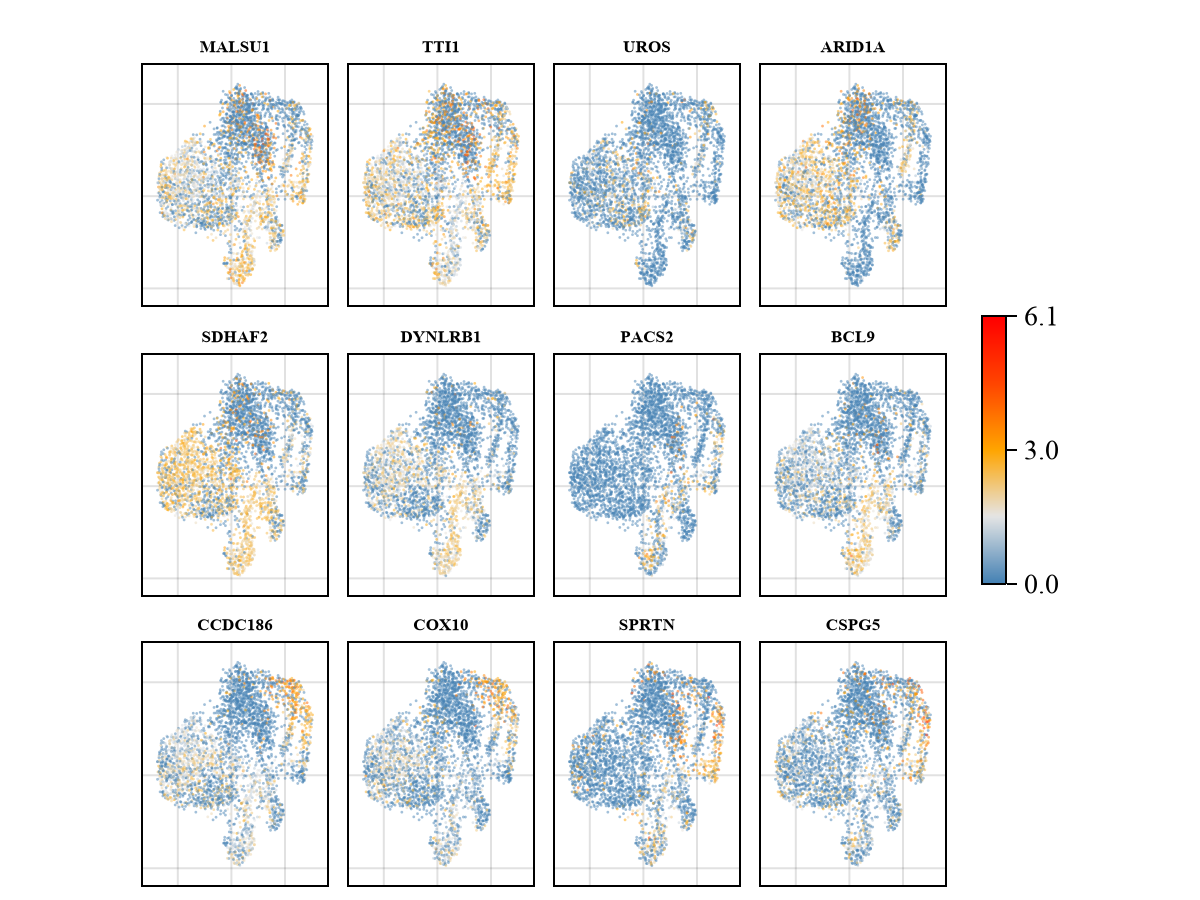

In [162]:
FeatureDimension(obj;point_size=2 , width = 400, height = 400, path = "dimension_plot.pdf")

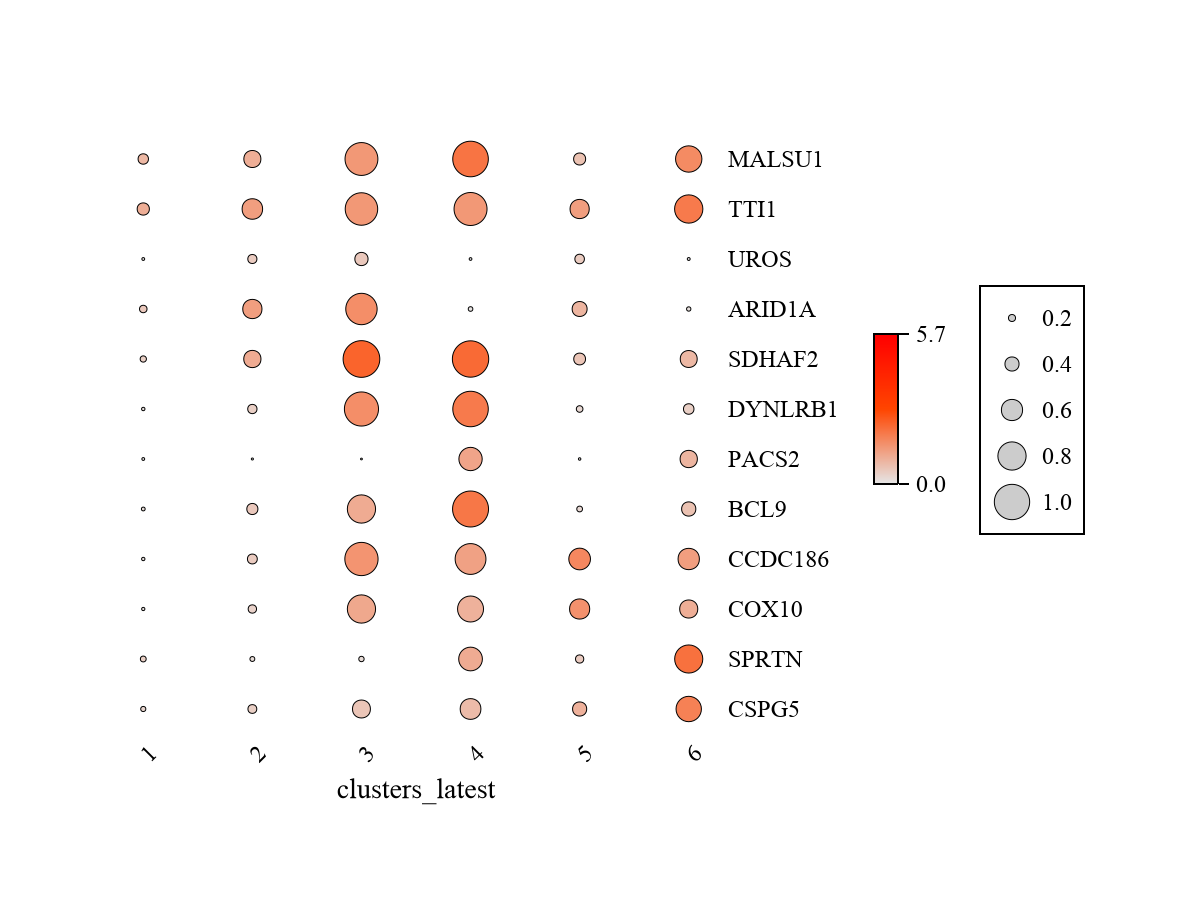

In [155]:
FeatureFracDots(obj; width = 300, height = 300 , circle_size= 25, path = "dot_plot.pdf")